# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Name & GitHub ID

- Name: Tai Le
- GitHub Username: tnl001

# Research Question

*Fill in your research question here*

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

# Data Cleaning

Load in the datasets

In [2]:
crime_2020 = pd.read_csv('pd_calls_for_service_2020_datasd.csv')
crime_2019 = pd.read_csv('pd_calls_for_service_2019_datasd.csv')
call_types = pd.read_csv('pd_cfs_calltypes_datasd.csv')
pd_beat_codes = pd.read_csv('pd_beat_neighborhoods_datasd.csv')

Here, I'm taking a quick look at what the data looks like

In [3]:
crime_2020.head()

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority
0,E20010000001,2020-01-01 00:00:09,4,400,NaN,06TH,AVE,NaN,NaN,NaN,11-8,A,523,0
1,E20010000002,2020-01-01 00:00:20,4,5000,NaN,UNIVERSITY,AVE,NaN,NaN,NaN,FD,K,826,2
2,E20010000003,2020-01-01 00:00:21,4,800,NaN,SAWTELLE,AVE,NaN,NaN,NaN,AU1,W,434,1
3,E20010000004,2020-01-01 00:00:32,4,5000,NaN,UNIVERSITY,AVE,NaN,NaN,NaN,FD,K,826,2
4,E20010000005,2020-01-01 00:00:42,4,5200,NaN,CLAIREMONT MESA,BLV,NaN,NaN,NaN,415V,K,111,1


Taking a look at the call_types dataset

In [4]:
call_types

,call_type,description,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,1016,PRISONER IN CUSTODY,NaN,NaN,NaN
1,1016PT,PTU (PRISONER TRANSPORT),NaN,NaN,NaN
2,1016QC,SHOPLIFTER/QUICK CITE,NaN,NaN,NaN
3,1021,PHONE YOUR STATION,NaN,NaN,NaN
4,1021H,PHONE YOUR HOME,NaN,NaN,NaN
...,...,...,...,...,...
284,TLO,TERRORISM LIAISON OFFICER,NaN,NaN,NaN
285,TP,TRAFFIC PURSUIT,NaN,NaN,NaN
286,TRO,"TRO VIOLATION, REPORT",NaN,NaN,NaN
287,VARDA,VARDA ALARM,NaN,NaN,NaN


Dropping the 3 Unnamed columns

In [5]:
call_types = call_types.dropna(axis=1)

I noticed that there are some inconsistency with the 11-6, 11-7, and 11-8 call type codes when opening them in Excel and reading them as csv using pandas. I replace the inconsistent values with the correct values.

In [6]:
for n in call_types['call_type'].values: 
    call_types['call_type'].replace(to_replace='6-Nov', value='11-6', inplace=True)
    call_types['call_type'].replace(to_replace='7-Nov', value='11-7', inplace=True)
    call_types['call_type'].replace(to_replace='8-Nov', value='11-8', inplace=True)

C:\Users\ltai2\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Dropping the unnecessary columns

In [9]:
cl_crime_2020 = cl_crime_2020.drop(labels=['address_dir_intersecting', 'address_road_intersecting', 
                                           'address_sfx_intersecting', 'address_dir_primary', 
                                           'address_number_primary', 'address_road_primary',
                                           'address_sfx_primary'], axis=1)

Merging the crime_2020 with call_types using the left outer joint method. This way, I will have the description from call_types for each call type in crime_2020.

In [8]:
cl_crime_2020 = crime_2020.merge(call_types, how='left')

In [10]:
cl_crime_2020.head()

,incident_num,date_time,day_of_week,call_type,disposition,beat,priority,description
0,E20010000001,2020-01-01 00:00:09,4,11-8,A,523,0,PERSON DOWN
1,E20010000002,2020-01-01 00:00:20,4,FD,K,826,2,FLAG DOWN/FIELD INITIATED
2,E20010000003,2020-01-01 00:00:21,4,AU1,W,434,1,ALL UNITS INFORMATION-PRI 1
3,E20010000004,2020-01-01 00:00:32,4,FD,K,826,2,FLAG DOWN/FIELD INITIATED
4,E20010000005,2020-01-01 00:00:42,4,415V,K,111,1,DISTURBING PEACE W/VIOLENCE


The beat code will determine which neighborhood it is that the crime occured. Here, I'm taking a quick look at the beat code dataset

In [27]:
pd_beat_codes.head()

,Beat,Neighborhood
0,111,Clairemont Mesa East
1,112,Clairemont Mesa West
2,113,Bay Ho
3,114,North Clairemont
4,115,University City


Renaming the columns so that they are all in lowercase.

In [28]:
pd_beat_codes.columns = ['beat', 'neighborhood']

Merging the crime_2020 with pd_beat_codes using the left outer joint method. This way, I will have the neighborhood's name from pd_beat_codes for each beat code in crime_2020.

In [30]:
cl_crime_2020 = cl_crime_2020.merge(pd_beat_codes, how='left')

In [31]:
cl_crime_2020.head()

,incident_num,date_time,day_of_week,call_type,disposition,beat,priority,description,neighborhood
0,E20010000001,2020-01-01 00:00:09,4,11-8,A,523,0,PERSON DOWN,Gaslamp
1,E20010000002,2020-01-01 00:00:20,4,FD,K,826,2,FLAG DOWN/FIELD INITIATED,Colina del Sol
2,E20010000003,2020-01-01 00:00:21,4,AU1,W,434,1,ALL UNITS INFORMATION-PRI 1,Jamacha/Lomita
3,E20010000004,2020-01-01 00:00:32,4,FD,K,826,2,FLAG DOWN/FIELD INITIATED,Colina del Sol
4,E20010000005,2020-01-01 00:00:42,4,415V,K,111,1,DISTURBING PEACE W/VIOLENCE,Clairemont Mesa East


Here, I'm just exploring the rows where neighborhood is NaN

In [40]:
cl_crime_2020[cl_crime_2020['neighborhood'].isna()][cl_crime_2020['description'] == 'DISCHARGING FIREARMS']

<ipython-input-40-1a3ebfadda79>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cl_crime_2020[cl_crime_2020['neighborhood'].isna()][cl_crime_2020['description'] == 'DISCHARGING FIREARMS']


,incident_num,date_time,day_of_week,call_type,disposition,beat,priority,description,neighborhood
10093,E20010009792,2020-01-06 21:21:10,2,11-6,K,-1,1,DISCHARGING FIREARMS,NaN
343355,E20070027786,2020-07-17 09:41:30,6,11-6,R,-1,1,DISCHARGING FIREARMS,NaN
454110,E20090031032,2020-09-18 22:10:41,6,11-6,K,28,1,DISCHARGING FIREARMS,NaN
457198,E20090033995,2020-09-20 19:40:51,1,11-6,K,38,1,DISCHARGING FIREARMS,NaN
457601,E20090034387,2020-09-21 00:43:28,2,11-6,K,73,1,DISCHARGING FIREARMS,NaN
548271,E20110017613,2020-11-11 19:54:44,4,11-6,K,-1,1,DISCHARGING FIREARMS,NaN


Attempting to drop all rows that contain NaN

In [45]:
cl_crime_2020 = cl_crime_2020.dropna()
cl_crime_2020.shape

(570430, 9)

Here, I'm focusing on a certain type of crime. Below are the call type codes that I used to extract the data:
1. 11-6: Discharging firearms
2. 207: Kidnapping in progress
3. 207R: Kidnapping report
4. 211: Robbery
5. 278: Child stealing
6. 415V: Disturbing peace with violence
7. 415W: Disturbing peace with[?] weapon
8. 417: Threatening with weapon

In [61]:
cl_crime_2020[(cl_crime_2020['call_type'] == '11-6') | (cl_crime_2020['call_type'] == '207') | 
              (cl_crime_2020['call_type'] == '207R') | (cl_crime_2020['call_type'] == '211') |
              (cl_crime_2020['call_type'] == '278') | (cl_crime_2020['call_type'] == '415V') |
              (cl_crime_2020['call_type'] == '415W') | (cl_crime_2020['call_type'] == '418')]

,incident_num,date_time,day_of_week,call_type,disposition,beat,priority,description,neighborhood
4,E20010000005,2020-01-01 00:00:42,4,415V,K,111,1,DISTURBING PEACE W/VIOLENCE,Clairemont Mesa East
8,E20010000010,2020-01-01 00:01:33,4,11-6,K,441,1,DISCHARGING FIREARMS,Mountain View
10,E20010000011,2020-01-01 00:02:22,4,415V,CAN,623,1,DISTURBING PEACE W/VIOLENCE,Mission Valley West
11,E20010000012,2020-01-01 00:02:45,4,415V,A,315,1,DISTURBING PEACE W/VIOLENCE,Mission Valley East
14,E20010000015,2020-01-01 00:03:53,4,11-6,K,833,0,DISCHARGING FIREARMS,Fairmount Village
...,...,...,...,...,...,...,...,...,...
580830,E20120001447,2020-12-01 20:23:53,3,415V,K,721,1,DISTURBING PEACE W/VIOLENCE,Egger Highlands
580844,E20120001466,2020-12-01 20:43:36,3,415V,O,526,1,DISTURBING PEACE W/VIOLENCE,Cortez
580857,E20120001488,2020-12-01 21:02:59,3,415W,K,833,1,DISTURBING PEACE UNCONC WEAPON,Fairmount Village
580867,E20120001505,2020-12-01 21:22:46,3,415V,K,314,1,DISTURBING PEACE W/VIOLENCE,Birdland


In [11]:
cl_crime_2020['priority'].unique()

array([0, 2, 1, 3, 4, 9, 7, 8, 5], dtype=int64)

In [12]:
parks = gpd.read_file('parks_datasd.geojson')

In [13]:
parks

,objectid,name,alias,gis_acres,park_type,location,owner,geometry
0,1,South Carlsbad SB,South Carlsbad State Beach,115.895878,State,,State Parks,"MULTIPOLYGON (((-117.31431 33.09015, -117.3142..."
1,2,Torrey Pines SB,Torrey Pines State Beach,67.294309,State,,State Parks,"POLYGON ((-117.26147 32.93883, -117.26181 32.9..."
2,3,Ruocco Park,Ruocco Park,3.312526,Local,"585 Harbor Ln, San Diego. California",SDUPD,"POLYGON ((-117.17298 32.71167, -117.17303 32.7..."
3,4,Tuna Harbor Park,Tuna Harbor Park,0.639035,Local,"700 North Harbor Dr, San Diego. California",SDUPD,"POLYGON ((-117.17260 32.71160, -117.17268 32.7..."
4,5,San Diego Bayfront Park,San Diego Bayfront Park,3.669272,Local,"One Park Boulevard, San Diego. California",SDUPD,"MULTIPOLYGON (((-117.16074 32.70407, -117.1594..."
...,...,...,...,...,...,...,...,...
2764,2765,San Luis Rey River Park,San Luis Rey River Park,712.262117,Open Space,"5521 W. Lilac Road, Bonsall, CA 92003",County DPR,"MULTIPOLYGON (((-117.17632 33.31105, -117.1766..."
2765,2766,Horse Creek Ridge Sports Park,Horse Creek Ridge Sports Park,8.398529,Local,"240 Gold Palomino Way, Fallbrook CA, 92028",County DPR,"POLYGON ((-117.15413 33.35376, -117.15413 33.3..."
2766,2767,,Harmony Grove Village 4th of July Park,2.510408,Local,"2815 STARRY NIGHT DR, Escondido, CA 92029",County DPR,"POLYGON ((-117.13226 33.10238, -117.13225 33.1..."
2767,2768,Harmony Grove Community Park,Harmony Grove Village Community Park,3.575260,Local,"2982 Harmony Grove Road, Escondido, CA 92029",County DPR,"POLYGON ((-117.13391 33.09869, -117.13376 33.0..."


In [14]:
parks_info = pd.read_csv('yelp_SD_parks.csv')

In [15]:
parks_info.head()

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False


In [16]:
parks_info = parks_info.drop(labels=['phone', 'rating', 'review_count', 'id'], axis=1)

In [17]:
parks_info.head()

,name,address,url,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",https://www.yelp.com/biz/balboa-park-san-diego...,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",https://www.yelp.com/biz/civita-park-san-diego...,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",https://www.yelp.com/biz/waterfront-park-san-d...,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",https://www.yelp.com/biz/trolley-barn-park-san...,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",https://www.yelp.com/biz/bay-view-park-coronad...,-117.178967,32.701785,False


In [18]:
recs = gpd.read_file('rec_centers_datasd.geojson')

In [19]:
recs.head()

,objectid,rec_bldg,park_name,address,zip,sq_ft,year_built,serv_dist,adult_ctr,comfort_st,...,stage,teen_ctr,tinytot_rm,weight_rm,current_cd,fy13_cd,facility_n,thomas_bro,community,geometry
0,2935,Scripps Ranch Rec Center,Scripps Ranch Community Park,11454 Blue Cypress Dr,92131,12080,2000,40,0,0,...,0,0,0,0,5,5,10279,1210-A2,MIRAMAR RANCH NORTH,POINT (-117.07986 32.92867)
1,2936,North Park Rec Center,North Park Community Park,4044 Idaho St,92104,11230,1947,41,1,0,...,0,1,1,0,3,3,488,1269-D5,NORTH PARK,POINT (-117.13418 32.75090)
2,2937,Southcrest Rec Center,Southcrest Community Park,4149 Newton Av,92113,10620,1964,43,0,0,...,0,1,0,1,8,9,299,1289-H6,SOUTHCREST,POINT (-117.10459 32.69427)
3,2938,Azalea Rec Center,Azalea Neighborhood Park,2596 Violet St,92105,1790,1973,41,0,0,...,0,0,0,0,3,9,1072,1269-H7,AZALEA/HOLLYWOOD PARK,POINT (-117.10817 32.73236)
4,2939,Colina Del Sol Rec Center,Colina Del Sol Community Park,5319 Orange Av,92115,6560,1962,41,0,0,...,0,0,0,0,7,9,491,1269-H4,COLINA DEL SOL,POINT (-117.08012 32.75282)


In [20]:
pd_beats = gpd.read_file('pd_beats_datasd.geojson')

In [21]:
pd_beats['name']

0                NORTH CITY
1                 SAN DIEGO
2                          
3                    NESTOR
4                  BIRDLAND
               ...         
135                 MIRAMAR
136    BLACK MOUNTAIN RANCH
137        TORREY HIGHLANDS
138      RANCHO PENASQUITOS
139             SAN PASQUAL
Name: name, Length: 140, dtype: object

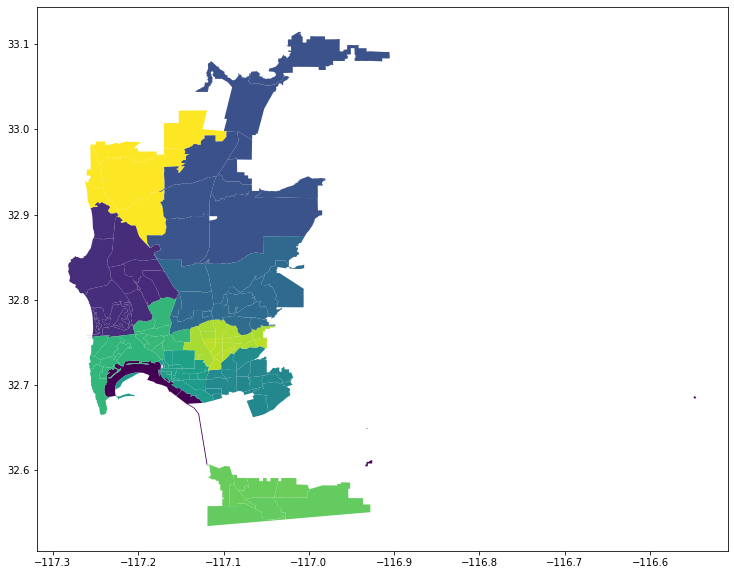

In [22]:
beats = pd_beats.plot(column='beat', figsize=(27,10))

In [23]:
cities = gpd.read_file('zip://ne_110m_populated_places.zip')

In [24]:
cities.plot(ax=beats, figsize=(27,10))

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [25]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*